<h2>Popular Data Science Topics on Stack Exchange<h2>

In this project we'll explore the most popular data science question on Stack Exchange Data Science to find the best content to write about for a data science learning platform. 

Stack Exchange provides a public database for each of its websites. Data Science Stack Exchange's database can be queried with Transact-SQL [here](https://data.stackexchange.com/datascience/query/new) and this is the schema of the [database](https://i.stack.imgur.com/AyIkW.png). In the cell below is the query to extract the necessary data from the above SQL database.

  
    SELECT "Id", "CreationDate",
           "Score", "ViewCount", "Tags",
           "AnswerCount", "FavoriteCount"
      FROM Posts
     WHERE PostTypeId = 1;
  


<h3>Exploring & Cleaning the Data<h3>

Now that we have the data, let's read it into pandas and explore it.

In [306]:
import pandas as pd

data = pd.read_csv("all_years.csv",parse_dates=["CreationDate"])
data.head()

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36385 entries, 0 to 36384
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             36385 non-null  int64         
 1   CreationDate   36385 non-null  datetime64[ns]
 2   Score          36385 non-null  int64         
 3   ViewCount      36385 non-null  int64         
 4   Tags           36385 non-null  object        
 5   AnswerCount    36385 non-null  int64         
 6   FavoriteCount  585 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.9+ MB


Above we see: 
<br>
1) the `Tags` column has an "object" dtype which is a catch-all: we'll have to investigate more here & clean this column to make it usable.<br>
2) the `FavoriteCount` column has many null values: this is probably because the post wasn't favorited by anyone. We can assume there are 0 favorites, and replace the null values with 0.<br>
<br>
First we'll replace the null values with 0:

In [308]:
data["FavoriteCount"].fillna(0,inplace=True)
data["FavoriteCount"] = data["FavoriteCount"].astype(int)
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,122443,2023-06-27 22:56:18,0,12,<sequence><google><ngrams><bag-of-words>,1,0
1,122450,2023-06-28 06:42:32,0,12,<regression><prediction><overfitting><huggingf...,0,0
2,122452,2023-06-28 11:05:10,0,24,<predictive-modeling><statistics><survival-ana...,0,0
3,122453,2023-06-28 14:36:56,0,26,<python><deep-learning><keras>,1,0
4,122455,2023-06-28 15:30:06,0,20,<python><pandas>,1,0


Next we'll work on the `Tags` column:

In [309]:
data["Tags"].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

The tags are all strings so we can clean them with string manipulation techniques, and store the collections of tags as lists:

In [310]:
data["Tags"] = data["Tags"].str.replace("^<|>$","",regex=True).str.split("><")
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,122443,2023-06-27 22:56:18,0,12,"[sequence, google, ngrams, bag-of-words]",1,0
1,122450,2023-06-28 06:42:32,0,12,"[regression, prediction, overfitting, huggingf...",0,0
2,122452,2023-06-28 11:05:10,0,24,"[predictive-modeling, statistics, survival-ana...",0,0
3,122453,2023-06-28 14:36:56,0,26,"[python, deep-learning, keras]",1,0
4,122455,2023-06-28 15:30:06,0,20,"[python, pandas]",1,0


<h3>Most Used and Most Viewed Tags<h3>

<Axes: >

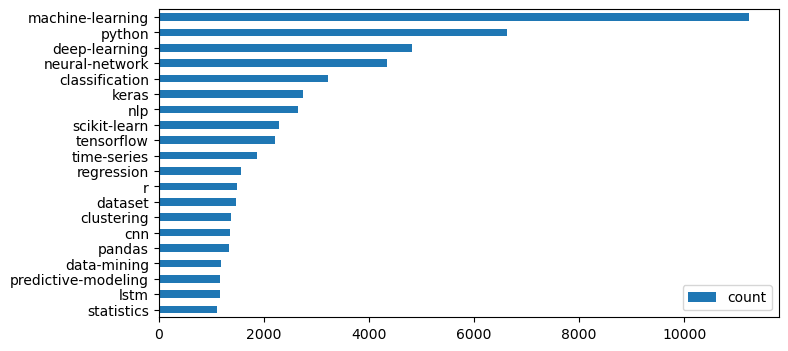

In [316]:
#How many times each tag was used:
tag_count = {}
for row in data["Tags"]:
    for tag in row:
        if tag in tag_count:
            tag_count[tag]+=1
        else:
            tag_count[tag]=1

tag_count_df = pd.DataFrame.from_dict(tag_count,orient="index")
tag_count_df.rename(columns={0:"count"},inplace=True)
most_used  = tag_count_df.sort_values(by="count",ascending=True).tail(20)
most_used.plot(kind="barh", figsize=(8,4))

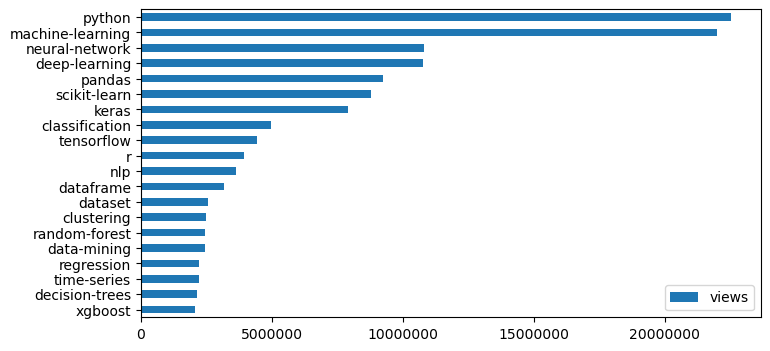

In [324]:
#How many times each tag was viewed:

tag_views = {}
for index, row in data.iterrows():
    for tag in row["Tags"]:
        if tag in tag_views:
            tag_views[tag]+=row["ViewCount"]
        else:
            tag_views[tag]=row["ViewCount"]
                
tag_views_df = pd.DataFrame.from_dict(tag_views,orient="index")
tag_views_df.rename(columns={0:"views"},inplace=True)
most_viewed = tag_views_df.sort_values(by="views",ascending=True).tail(20)


import matplotlib.pyplot as plt
most_viewed.plot(kind="barh",figsize=(8,4))
plt.ticklabel_format(style='plain', axis='x')

Most of the top `Tags` are related by the machine learning theme of deep learning. Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning which is a type of neural network. 

<h3>Popularity of Deep Learning Year-over-Year<h3>

Now we'll graph the popularity of deep learning questions over the years to see if we find long-term trends.

We'll the read the data in below and then add a new column to the data that indicates whether a given post was about deep learning:

In [279]:
def deep_learn(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0
    
data["DeepLearning"] = data["Tags"].apply(deep_learn)
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning
0,122443,2023-06-27 22:56:18,0,12,"[sequence, google, ngrams, bag-of-words]",1,0,0
1,122450,2023-06-28 06:42:32,0,12,"[regression, prediction, overfitting, huggingf...",0,0,0
2,122452,2023-06-28 11:05:10,0,24,"[predictive-modeling, statistics, survival-ana...",0,0,0
3,122453,2023-06-28 14:36:56,0,26,"[python, deep-learning, keras]",1,0,1
4,122455,2023-06-28 15:30:06,0,20,"[python, pandas]",1,0,0


Tracking the popularity Quarter-over-Quarter is a granular enough time-period for this purpose. We'll add a `Quarter` column to our dataframe for this purpose.<br>


In [281]:
def quarter(date):
    quarter = date.quarter
    year = date.year
    return "{y} Q{q}".format(y=year, q=quarter)

data["Quarter"] = data["CreationDate"].apply(quarter)

We'll also look into the Deep Learning Rate QoQ: that is how the ratio of deep learning posts to total posts fluctuates QoQ. We'll also add a `DLRate` column.

In [284]:
date_filter = data["CreationDate"]<"2023-06-30"
quarterly = data[date_filter]

quarterly = quarterly.groupby(by="Quarter").agg({"DeepLearning":["sum", "size"]})
quarterly.columns = ["DLQuestions","AllQuestions"]
quarterly["DLRate"] = round(100*quarterly["DLQuestions"]/quarterly["AllQuestions"],2)
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DLQuestions,AllQuestions,DLRate
35,2023 Q1,390,1166,33.45
15,2018 Q1,553,1199,46.12
36,2023 Q2,302,942,32.06
3,2015 Q1,17,188,9.04
11,2017 Q1,244,690,35.36


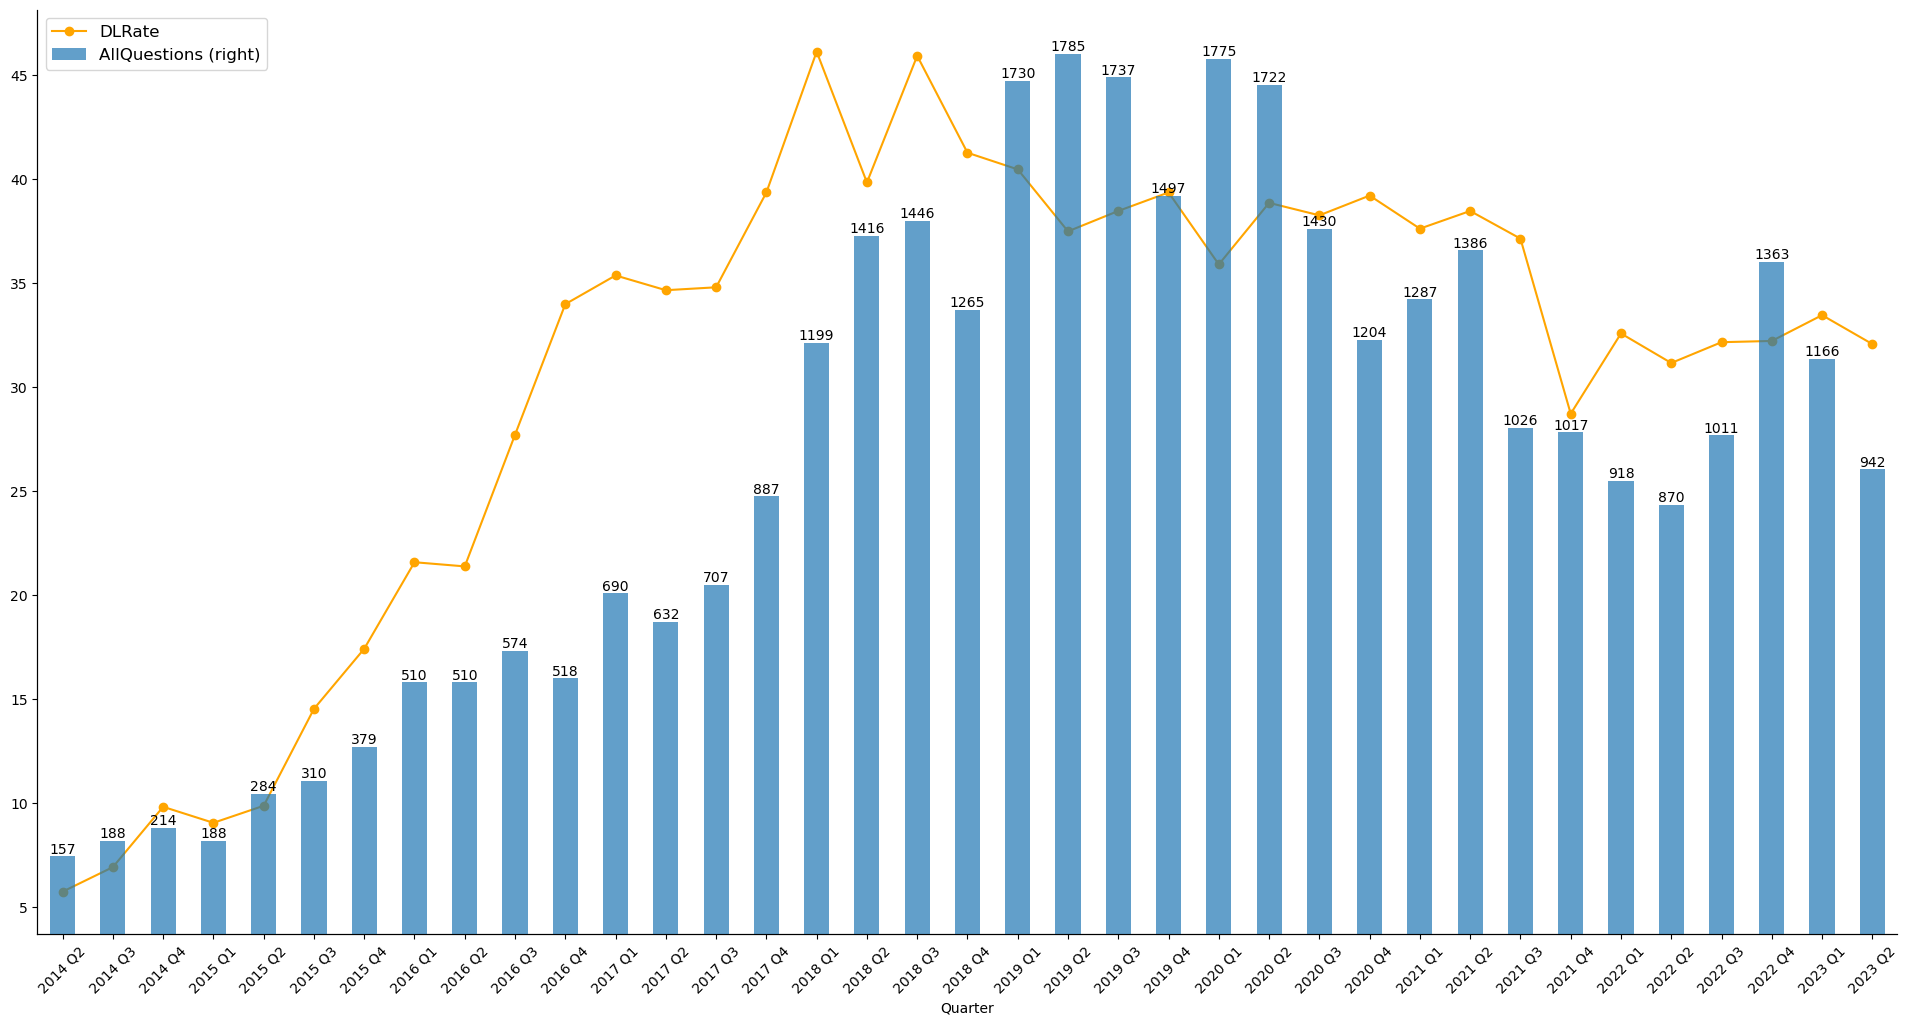

In [326]:
ax1 = quarterly.plot(x="Quarter", y="DLRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="AllQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["AllQuestions"].items():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Based on the graph above, deep learning questions were a fast-growing trend the start of Data Science Stack Exchange. Post Q1 2018 it has been begun plateauing, fluctuating between 35% to 28% in recent quarters. Interest in deep learning continues to account for approximately a third of all questions indicating a strong interest.

<h3>Conclusion<h3>

Given that the top tags are related by a deep learning theme and there's a demonstrated strong interest in the topic within Data Science Stack Exchange's questions over the years, we can recommend that the learning platform focus on deep learning courses. More specifically, the platform could create Python content that uses deep learning for classification problems and other variations on this.